## Initialize session

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 3 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
star_age = ms.star_log(mass=3,Z=0.02)
star = mp.se(mass=3,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


## Find the Red Giant Branch

<IPython.core.display.Javascript object>


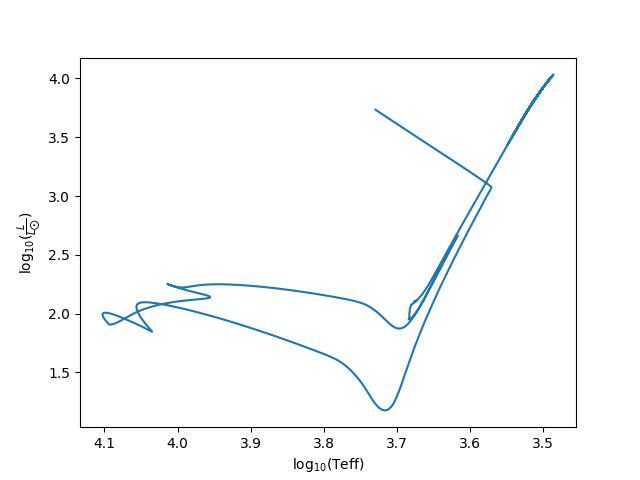

In [15]:
figure(1)
temp_surface = star_age.get('log_Teff')
luminosity = star_age.get('log_L')
plot(temp_surface[0:13000],luminosity[0:13000])
gca().invert_xaxis()
xlabel('log$_{10}$(Teff)')
ylabel(r"log$_{10}(\frac{L}{L_{\bigodot}})$")

<IPython.core.display.Javascript object>


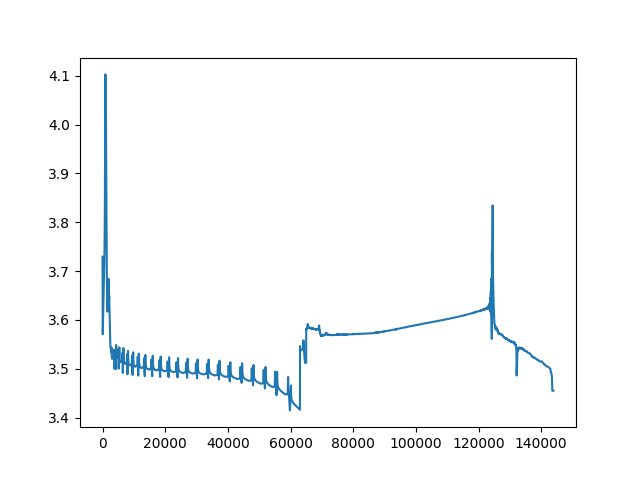

In [16]:
figure(2)
model = star_age.get('model_number')
plot(model,temp_surface)

## Collect the variables and plot
* Calculate the pressure scale height as a function of radius/mass
* $\rho$ and T as a fucntion of radius as well as mass

In [42]:
# the model number of a red giant
model_number = 1300

# what are the variables you can use?
star.se.dcols

# grab quantities
density = star.get([model_number],'rho')
mass = star.get([model_number],'mass')
temperature = star.get([model_number],'temperature')
radius = star.get([model_number],'radius')
#radius2 = star.get('radius')
#density2 = star.get('rho')

# transform temperature to K
for i in range(len(temperature)):
    temperature[i] = 1e8 * temperature[i]

 reading ['radius']...100%.100%

0.011119347118630401

## $\rho$ and T as a Function of Radius

<IPython.core.display.Javascript object>


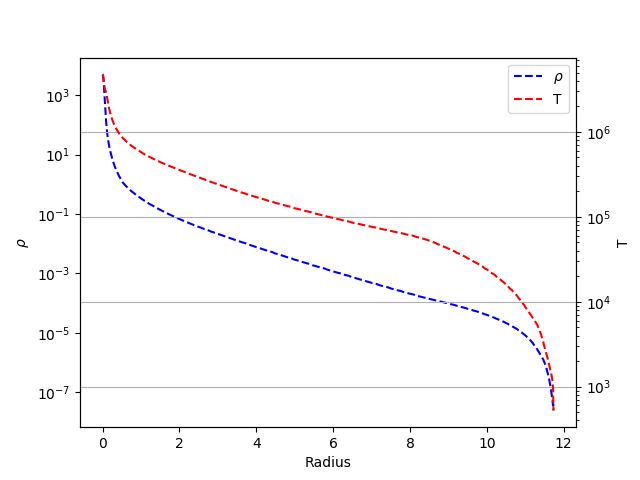

In [43]:
fig, ax1 = subplots()
ax2 = ax1.twinx()

ax1.plot(radius[0],density[0],'b--',label=r"$\rho$")
ax2.plot(radius[0],temperature[0],'r--',label='T')
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('Radius')
ax1.set_ylabel(r"$\rho$")
ax2.set_ylabel('T')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
grid()

## $\rho$ and T as a Function of Mass

<IPython.core.display.Javascript object>


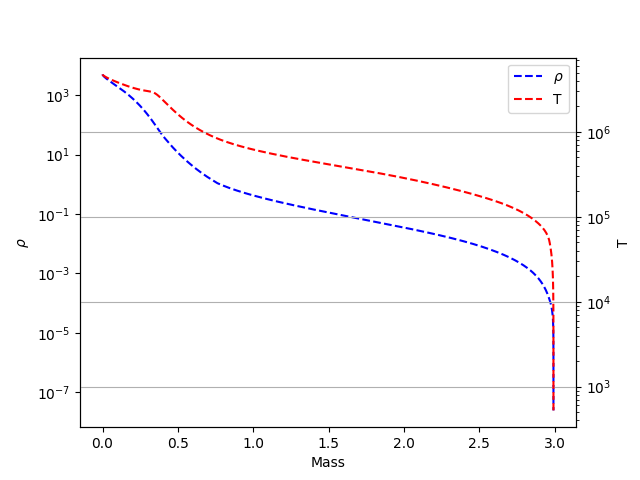

In [44]:
fig, ax1 = subplots()
ax2 = ax1.twinx()

ax1.plot(mass[0],density[0],'b--',label=r"$\rho$")
ax2.plot(mass[0],temperature[0],'r--',label='T')
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('Mass')
ax1.set_ylabel(r"$\rho$")
ax2.set_ylabel('T')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)
grid()

What's happening at the centre of the star? ...

In [8]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

<IPython.core.display.Javascript object>

NameError: name 's' is not defined

... and at the surface?

In [ ]:
#s.cols
ifig=111;close(ifig);figure(ifig)
s.plot('model_number','log_Teff')

In [ ]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

In [ ]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [ ]:
pt=mp.se(mass=2,Z=0.02)

### Abundance profiles 

#### A number of isotopes in the H shell 
In the stellar evolution analysis we found that a H-burning shell inbetween thermal pulses could be found at cycle 18000. Let's plot a few isotopes that are being created or destroyed in this H-burning shell:

In [ ]:
# pt.abu_profile?

and the nuclides that are being created or destroyed in this part of the star:

In [ ]:
species=['H-1','He-4','C-12','C-13','N-14','O-16']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=1023, logy=True)
ylim(-7,0)
#xlim(0.552,0.556)

#### Abundance profile at the time of formation of the partial-mix zone

In [ ]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

In [ ]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

In [ ]:
ifig=122;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47222, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Isotopic abundance distribution in the C13 pocket

#### Static plots



In [ ]:
# help
#pt.iso_abund?

In [ ]:
ifig=123;close(ifig);figure(ifig)
pt.iso_abund(47221, stable=True,amass_range=[50,210], mass_range=[0.60312,0.6032], ylim=[-9, -2])


### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [ ]:
# pt.abu_chart?

In [ ]:
#ifig=1233;close(ifig);figure(ifig)
pt.abu_chart(47220,mass_range=[0.60312,0.6032], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)


You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [ ]:
pt.abund_at_masscoordinate(26100,0.57685,online=True)

In [ ]:
pt.get?

In [ ]:
a = pt.get([4722],'mass')
b = pt.get([4722],'radius')

In [ ]:
figure()
plot(b[0],a[0])